In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas
  
!unzip /content/drive/MyDrive/datasets/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: ready/train/rock/Rock_1382.png  
  inflating: ready/train/rock/Rock_1383.png  
  inflating: ready/train/rock/Rock_1384.png  
  inflating: ready/train/rock/Rock_1385.png  
  inflating: ready/train/rock/Rock_1386.png  
  inflating: ready/train/rock/Rock_1387.png  
  inflating: ready/train/rock/Rock_1388.png  
  inflating: ready/train/rock/Rock_1389.png  
  inflating: ready/train/rock/Rock_139.png  
  inflating: ready/train/rock/Rock_1390.png  
  inflating: ready/train/rock/Rock_1391.png  
  inflating: ready/train/rock/Rock_1392.png  
  inflating: ready/train/rock/Rock_1393.png  
  inflating: ready/train/rock/Rock_1394.png  
  inflating: ready/train/rock/Rock_1395.png  
  inflating: ready/train/rock/Rock_1396.png  
  inflating: ready/train/rock/Rock_1397.png  
  inflating: ready/train/rock/Rock_1398.png  
  inflating: ready/train/rock/Rock_1399.png  
  inflating: ready/train/rock/Rock_14.png  
  inflating: ready/train/rock/Ro

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# extract zip file
import zipfile
import os
train = '/content/ready/train'
val = '/content/ready/val'

In [9]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    featurewise_center=True,
    brightness_range=(0.1,0.9),
)

validation_datagen = ImageDataGenerator(
      rescale = 1.0/255,
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size = (50, 50),
    color_mode = "grayscale",
    class_mode = 'categorical',
    batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
    val,
    target_size = (50, 50),
    color_mode = "grayscale",
    class_mode = 'categorical',
    batch_size = 128
)

Found 7061 images belonging to 4 classes.
Found 1958 images belonging to 4 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (50, 50, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.54),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.7),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.7),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.6),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.64),

    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [12]:
# count loss function and optimizer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = "rmsprop",
    metrics = ['accuracy']               
)

In [ ]:
# callbacks
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

In [13]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size,
    epochs = 150,
    validation_data = validation_generator,
    validation_steps = validation_generator.n//validation_generator.batch_size
)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/150
55/55 [==============================] - 16s 128ms/step - loss: 1.3917 - accuracy: 0.2641 - val_loss: 1.3867 - val_accuracy: 0.2557
Epoch 2/150
55/55 [==============================] - 8s 143ms/step - loss: 1.3820 - accuracy: 0.2745 - val_loss: 1.3864 - val_accuracy: 0.2599
Epoch 3/150
55/55 [==============================] - 6s 119ms/step - loss: 1.3790 - accuracy: 0.2787 - val_loss: 1.3860 - val_accuracy: 0.2552
Epoch 4/150
55/55 [==============================] - 7s 131ms/step - loss: 1.3758 - accuracy: 0.2818 - val_loss: 1.3860 - val_accuracy: 0.2552
Epoch 5/150
55/55 [==============================] - 6s 115ms/step - loss: 1.3692 - accuracy: 0.2891 - val_loss: 1.3767 - val_accuracy: 0.2505
Epoch 6/150
55/55 [==============================] - 6s 116ms/step - loss: 1.3608 - accuracy: 0.3068 - val_loss: 1.3854 - val_accuracy: 0.2552
Epoch 7/150
55/55 [==============================] - 6s 116ms/step - loss: 1.3603 - accuracy: 0.2986 - val_loss: 1.3837 - val_accuracy: 0.256

ValueError: ignored

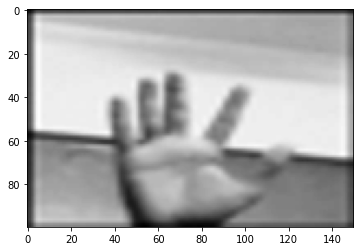

In [14]:
import numpy as np
from google.colab import files
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

# predict images
path = "/content/ready/val/paper/0.png"

img_source = Image.open(path).convert('L').resize((150,100))
imgplot = plt.imshow(img_source, cmap=plt.get_cmap('gray'))
x = image.img_to_array(img_source)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)

print(path)
if classes[0, 0] == 1:
  print('paper')
elif classes[0, 1] == 1:
  print('rock')
elif classes[0, 2] == 1:
  print('scissors')

In [15]:
model_json = model.to_json()

with open("model1/model.json","w") as model_json_file:
    model_json_file.write(model_json)
    
model.save_weights("model1/model_weights.h5")
print("model saved")

model saved
